In [ ]:
# import all required libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd

import random

from keras.preprocessing.text import Tokenizer
from keras.datasets import reuters

In [ ]:
# Load the data - training as well as testing
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data()

# Prepare the data that can be used by the next step - creating and training the DL model
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

max = train_images.max() + 1
train_images = train_images / max
test_images = test_images / max

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 
               'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant',
               'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree',
               'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
               'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
               'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe',
               'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores',
                 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles',
                 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


169017344/169001437 [==============================] - 2s 0us/step


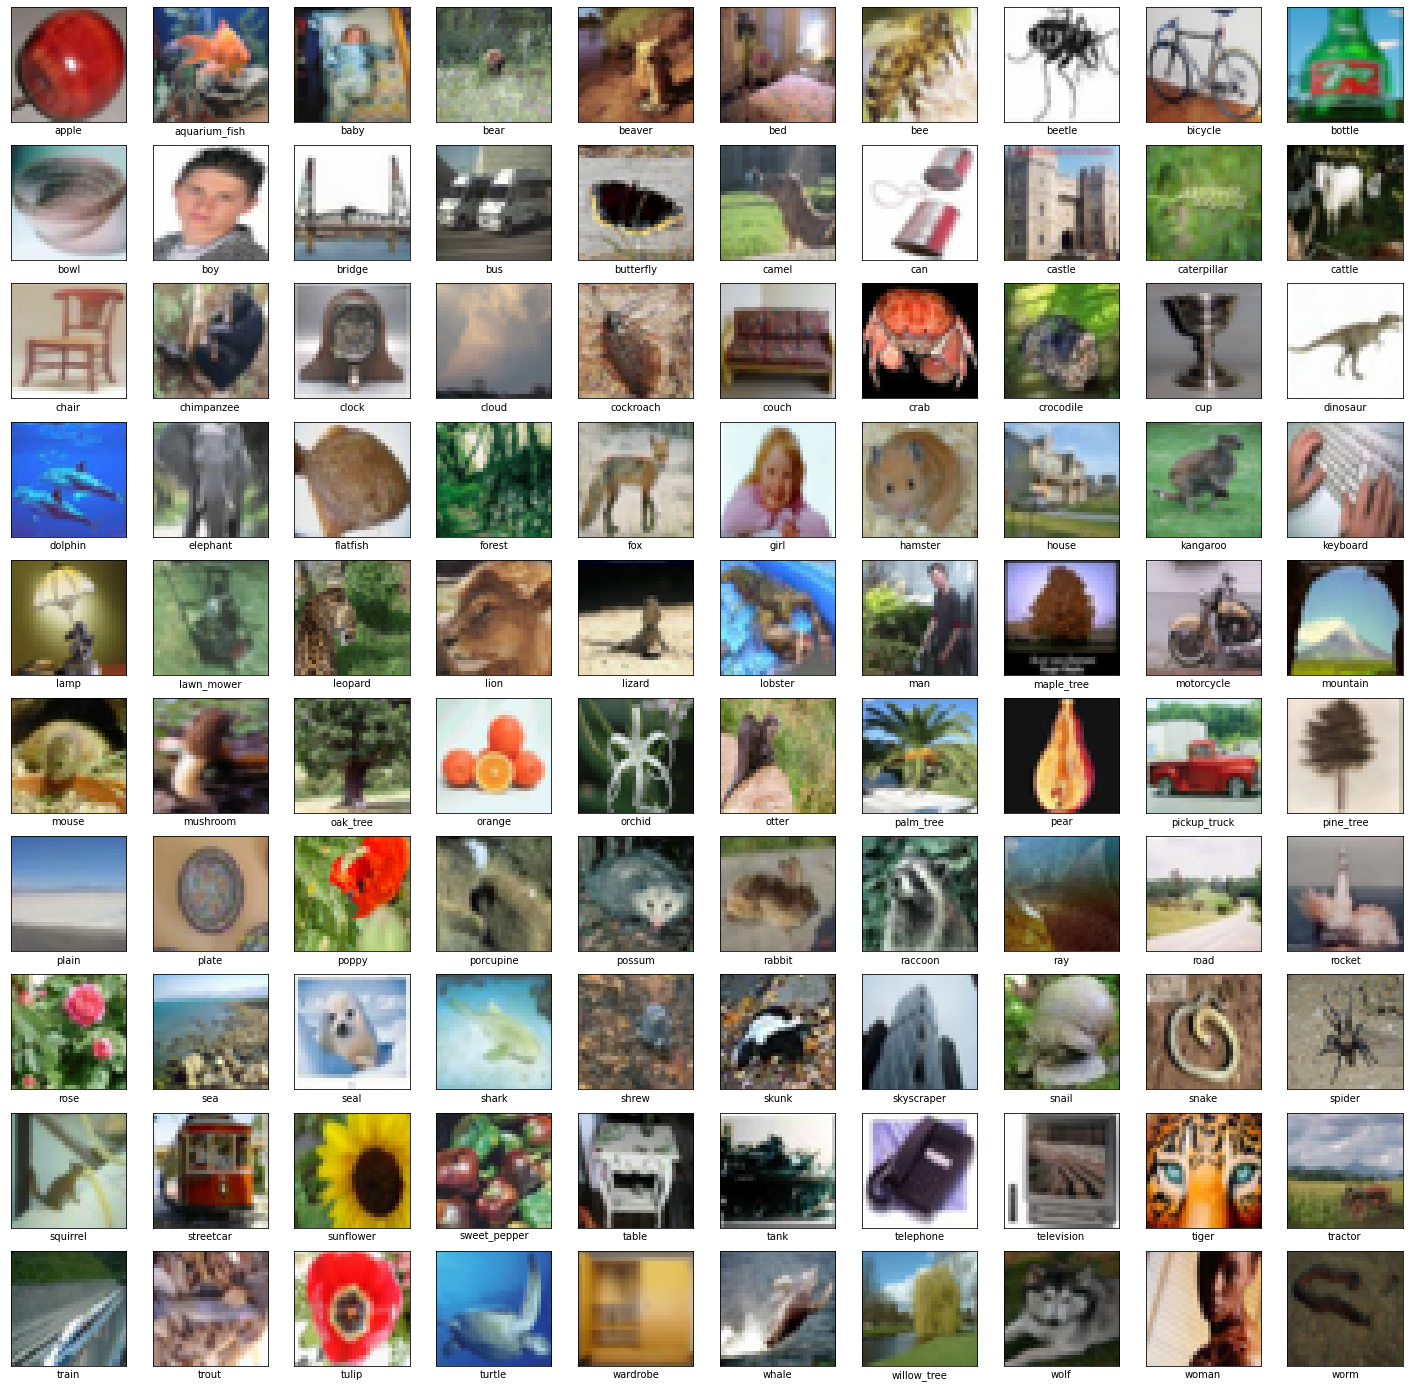

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
def rand_pic_list():
  end_list = []
  for label_index in range(len(fine_labels)):
    test_list = []
    for tlab_index in range(len(train_labels)):
      if fine_labels[int(train_labels[tlab_index])] == fine_labels[label_index]:
        test_list.append(tlab_index)
    end_list.append((label_index, test_list))

  listp = []

  for lable_index in end_list:
    r = random.randrange(0, len(lable_index[1]))
    x = lable_index[1][r]
    listp.append((x))
  return listp


plt.figure(figsize=(25,25))
listp = rand_pic_list()

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[listp[i]], cmap=plt.cm.binary)
    plt.xlabel(fine_labels[i])
plt.show()

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network 
def create_cnn_model():
  model = tf.keras.Sequential([
      # Conv 2D, MaxPool, with optional Dropout
      tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.MaxPooling2D(pool_size=2),
      tf.keras.layers.Dropout(0.3),

      # Conv 2D, MaxPool, with optional Dropout
      tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=2),
      tf.keras.layers.Dropout(0.3),

      # Flatten the layer to feed to Dense layer
      tf.keras.layers.Flatten(),

      # Final Dense layers for classification
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      # Converting to probability domain using Softmax
      tf.keras.layers.Dense(100, activation='softmax')
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #for classification problems, we use cross entropy loss
              metrics=['accuracy'])

  return model


In [ ]:
# Print the DL model summary
model = create_cnn_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_path = "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [ ]:
# Train/fit the DL model using the training CIFAR-100 data


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

# Train the model with the new callback
history = model.fit(train_images, 
          train_labels,  
          epochs=15,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])


Epoch 1/15
1562/1563 [============================>.] - ETA: 0s - loss: 4.0260 - accuracy: 0.0834
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1563/1563 [==============================] - 85s 54ms/step - loss: 4.0262 - accuracy: 0.0834 - val_loss: 3.5349 - val_accuracy: 0.1817
Epoch 2/15
1562/1563 [============================>.] - ETA: 0s - loss: 3.5253 - accuracy: 0.1600
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1563/1563 [==============================] - 80s 51ms/step - loss: 3.5253 - accuracy: 0.1600 - val_loss: 3.1837 - val_accuracy: 0.2393
Epoch 3/15
1562/1563 [============================>.] - ETA: 0s - loss: 3.3195 - accuracy: 0.1933
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1563/1563 [==============================] - 78s 50ms/step - loss: 3.3194 - accuracy: 0.1933 - val_loss: 3.0955 - val_accuracy: 0.2606
Epoch 4/15
1562/1563 [============================>.] - ETA: 0s - loss: 3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


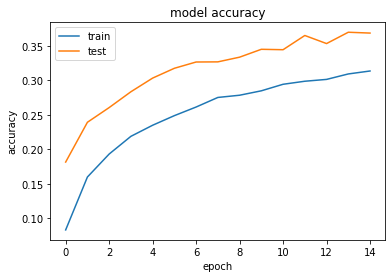

In [ ]:
# Plot the training/validation accuracy and loss
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Re-initialize the model
newModel = create_cnn_model()


In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
newModel.load_weights(checkpoint_path)


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(fine_labels[predicted_label],
                                100*np.max(predictions_array),
                                fine_labels[int(true_label)]),
                                color=color)

313/313 - 3s - loss: 2.5336 - accuracy: 0.3685 - 3s/epoch - 10ms/step


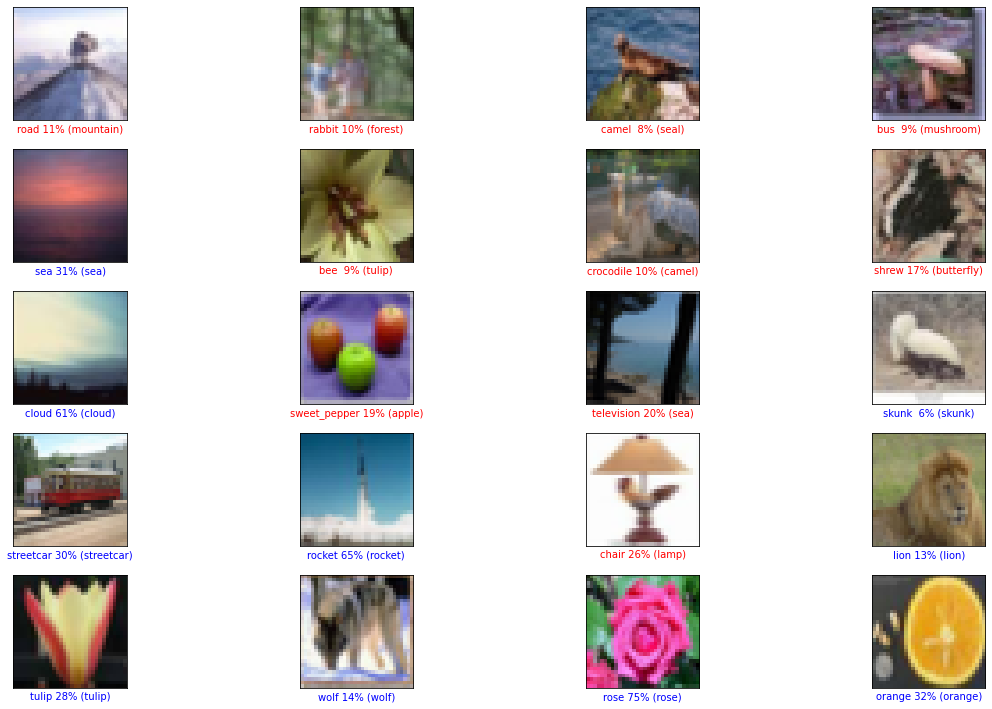

In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
test_loss, test_acc = newModel.evaluate(test_images,  test_labels, verbose=2)

ypred = model.predict(test_images)

num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, ypred[i], test_labels, test_images)
plt.tight_layout()
plt.show()